# Set up example code

## Model setup

In [1]:
from __future__ import print_function

import subprocess

from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process import kernels
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from IPython.display import display, clear_output


from scipy.linalg import lapack
from scipy import stats
import emcee
import numpy as np

import os
import pickle
from pathlib import Path

import src.reader as Reader

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Step 1: prepare input pickle file

### Load stuff from text files

In [2]:
# Read data files
RawData1M   = Reader.ReadData('input/MATTERTruncated/Data_PHENIX_AuAu200_RAACharged_0to10_2013.dat')
RawData2M   = Reader.ReadData('input/MATTERTruncated/Data_PHENIX_AuAu200_RAACharged_40to50_2013.dat')
RawData3M   = Reader.ReadData('input/MATTERTruncated/Data_ATLAS_PbPb2760_RAACharged_0to5_2015.dat')
RawData4M   = Reader.ReadData('input/MATTERTruncated/Data_ATLAS_PbPb2760_RAACharged_30to40_2015.dat')
RawData5M   = Reader.ReadData('input/MATTERTruncated/Data_CMS_PbPb5020_RAACharged_0to10_2017.dat')
RawData6M   = Reader.ReadData('input/MATTERTruncated/Data_CMS_PbPb5020_RAACharged_30to50_2017.dat')
RawData1L   = Reader.ReadData('input/LBTJake/Data_PHENIX_AuAu200_RAACharged_0to10_2013.dat')
RawData2L   = Reader.ReadData('input/LBTJake/Data_PHENIX_AuAu200_RAACharged_40to50_2013.dat')
RawData3L   = Reader.ReadData('input/LBTJake/Data_ATLAS_PbPb2760_RAACharged_0to5_2015.dat')
RawData4L   = Reader.ReadData('input/LBTJake/Data_ATLAS_PbPb2760_RAACharged_30to40_2015.dat')
RawData5L   = Reader.ReadData('input/LBTJake/Data_CMS_PbPb5020_RAACharged_0to10_2017.dat')
RawData6L   = Reader.ReadData('input/LBTJake/Data_CMS_PbPb5020_RAACharged_30to50_2017.dat')
RawData1ML1 = Reader.ReadData('input/MATTERLBT1/Data_PHENIX_AuAu200_RAACharged_0to10_2013.dat')
RawData2ML1 = Reader.ReadData('input/MATTERLBT1/Data_PHENIX_AuAu200_RAACharged_40to50_2013.dat')
RawData3ML1 = Reader.ReadData('input/MATTERLBT1/Data_ATLAS_PbPb2760_RAACharged_0to5_2015.dat')
RawData4ML1 = Reader.ReadData('input/MATTERLBT1/Data_ATLAS_PbPb2760_RAACharged_30to40_2015.dat')
RawData5ML1 = Reader.ReadData('input/MATTERLBT1/Data_CMS_PbPb5020_RAACharged_0to10_2017.dat')
RawData6ML1 = Reader.ReadData('input/MATTERLBT1/Data_CMS_PbPb5020_RAACharged_30to50_2017.dat')
RawData1ML2 = Reader.ReadData('input/MATTERLBT2/Data_PHENIX_AuAu200_RAACharged_0to10_2013.dat')
RawData2ML2 = Reader.ReadData('input/MATTERLBT2/Data_PHENIX_AuAu200_RAACharged_40to50_2013.dat')
RawData3ML2 = Reader.ReadData('input/MATTERLBT2/Data_ATLAS_PbPb2760_RAACharged_0to5_2015.dat')
RawData4ML2 = Reader.ReadData('input/MATTERLBT2/Data_ATLAS_PbPb2760_RAACharged_30to40_2015.dat')
RawData5ML2 = Reader.ReadData('input/MATTERLBT2/Data_CMS_PbPb5020_RAACharged_0to10_2017.dat')
RawData6ML2 = Reader.ReadData('input/MATTERLBT2/Data_CMS_PbPb5020_RAACharged_30to50_2017.dat')

# Read covariance
RawCov11L = Reader.ReadCovariance('input/LBT/Covariance_PHENIX_AuAu200_RAACharged_0to10_2013_PHENIX_AuAu200_RAACharged_0to10_2013_Jake.dat')
RawCov22L = Reader.ReadCovariance('input/LBT/Covariance_PHENIX_AuAu200_RAACharged_40to50_2013_PHENIX_AuAu200_RAACharged_40to50_2013_Jake.dat')
RawCov33L = Reader.ReadCovariance('input/LBT/Covariance_ATLAS_PbPb2760_RAACharged_0to5_2015_ATLAS_PbPb2760_RAACharged_0to5_2015_Jake.dat')
RawCov44L = Reader.ReadCovariance('input/LBT/Covariance_ATLAS_PbPb2760_RAACharged_30to40_2015_ATLAS_PbPb2760_RAACharged_30to40_2015_Jake.dat')
RawCov55L = Reader.ReadCovariance('input/LBT/Covariance_CMS_PbPb5020_RAACharged_0to10_2017_CMS_PbPb5020_RAACharged_0to10_2017_Jake.dat')
RawCov66L = Reader.ReadCovariance('input/LBT/Covariance_CMS_PbPb5020_RAACharged_30to50_2017_CMS_PbPb5020_RAACharged_30to50_2017_Jake.dat')

RawCov11E = Reader.ReadCovariance('input/Example/Covariance_PHENIX_AuAu200_RAACharged_0to10_2013_PHENIX_AuAu200_RAACharged_0to10_2013_SmallL.dat')
RawCov22E = Reader.ReadCovariance('input/Example/Covariance_PHENIX_AuAu200_RAACharged_40to50_2013_PHENIX_AuAu200_RAACharged_40to50_2013_SmallL.dat')
RawCov33E = Reader.ReadCovariance('input/Example/Covariance_ATLAS_PbPb2760_RAACharged_0to5_2015_ATLAS_PbPb2760_RAACharged_0to5_2015_SmallL.dat')
RawCov44E = Reader.ReadCovariance('input/Example/Covariance_ATLAS_PbPb2760_RAACharged_30to40_2015_ATLAS_PbPb2760_RAACharged_30to40_2015_SmallL.dat')
RawCov55E = Reader.ReadCovariance('input/Example/Covariance_CMS_PbPb5020_RAACharged_0to10_2017_CMS_PbPb5020_RAACharged_0to10_2017_SmallL.dat')
RawCov66E = Reader.ReadCovariance('input/Example/Covariance_CMS_PbPb5020_RAACharged_30to50_2017_CMS_PbPb5020_RAACharged_30to50_2017_SmallL.dat')

# Read design points
RawDesignM   = Reader.ReadDesign('input/MATTERTruncated/Design.dat')
RawDesignL   = Reader.ReadDesign('input/LBTJake/Design.dat')
RawDesignML1 = Reader.ReadDesign('input/MATTERLBT1/Design.dat')
RawDesignML2 = Reader.ReadDesign('input/MATTERLBT2/Design.dat')

# Read model prediction
RawPrediction1M   = Reader.ReadPrediction('input/MATTERTruncated/Prediction_PHENIX_AuAu200_RAACharged_0to10_2013.dat')
RawPrediction2M   = Reader.ReadPrediction('input/MATTERTruncated/Prediction_PHENIX_AuAu200_RAACharged_40to50_2013.dat')
RawPrediction3M   = Reader.ReadPrediction('input/MATTERTruncated/Prediction_ATLAS_PbPb2760_RAACharged_0to5_2015.dat')
RawPrediction4M   = Reader.ReadPrediction('input/MATTERTruncated/Prediction_ATLAS_PbPb2760_RAACharged_30to40_2015.dat')
RawPrediction5M   = Reader.ReadPrediction('input/MATTERTruncated/Prediction_CMS_PbPb5020_RAACharged_0to10_2017.dat')
RawPrediction6M   = Reader.ReadPrediction('input/MATTERTruncated/Prediction_CMS_PbPb5020_RAACharged_30to50_2017.dat')
RawPrediction1L   = Reader.ReadPrediction('input/LBTJake/Prediction_PHENIX_AuAu200_RAACharged_0to10_2013.dat')
RawPrediction2L   = Reader.ReadPrediction('input/LBTJake/Prediction_PHENIX_AuAu200_RAACharged_40to50_2013.dat')
RawPrediction3L   = Reader.ReadPrediction('input/LBTJake/Prediction_ATLAS_PbPb2760_RAACharged_0to5_2015.dat')
RawPrediction4L   = Reader.ReadPrediction('input/LBTJake/Prediction_ATLAS_PbPb2760_RAACharged_30to40_2015.dat')
RawPrediction5L   = Reader.ReadPrediction('input/LBTJake/Prediction_CMS_PbPb5020_RAACharged_0to10_2017.dat')
RawPrediction6L   = Reader.ReadPrediction('input/LBTJake/Prediction_CMS_PbPb5020_RAACharged_30to50_2017.dat')
RawPrediction1ML1 = Reader.ReadPrediction('input/MATTERLBT1/Prediction_PHENIX_AuAu200_RAACharged_0to10_2013.dat')
RawPrediction2ML1 = Reader.ReadPrediction('input/MATTERLBT1/Prediction_PHENIX_AuAu200_RAACharged_40to50_2013.dat')
RawPrediction3ML1 = Reader.ReadPrediction('input/MATTERLBT1/Prediction_ATLAS_PbPb2760_RAACharged_0to5_2015.dat')
RawPrediction4ML1 = Reader.ReadPrediction('input/MATTERLBT1/Prediction_ATLAS_PbPb2760_RAACharged_30to40_2015.dat')
RawPrediction5ML1 = Reader.ReadPrediction('input/MATTERLBT1/Prediction_CMS_PbPb5020_RAACharged_0to10_2017.dat')
RawPrediction6ML1 = Reader.ReadPrediction('input/MATTERLBT1/Prediction_CMS_PbPb5020_RAACharged_30to50_2017.dat')
RawPrediction1ML2 = Reader.ReadPrediction('input/MATTERLBT2/Prediction_PHENIX_AuAu200_RAACharged_0to10_2013.dat')
RawPrediction2ML2 = Reader.ReadPrediction('input/MATTERLBT2/Prediction_PHENIX_AuAu200_RAACharged_40to50_2013.dat')
RawPrediction3ML2 = Reader.ReadPrediction('input/MATTERLBT2/Prediction_ATLAS_PbPb2760_RAACharged_0to5_2015.dat')
RawPrediction4ML2 = Reader.ReadPrediction('input/MATTERLBT2/Prediction_ATLAS_PbPb2760_RAACharged_30to40_2015.dat')
RawPrediction5ML2 = Reader.ReadPrediction('input/MATTERLBT2/Prediction_CMS_PbPb5020_RAACharged_0to10_2017.dat')
RawPrediction6ML2 = Reader.ReadPrediction('input/MATTERLBT2/Prediction_CMS_PbPb5020_RAACharged_30to50_2017.dat')

### Keep only part of the model prediction

In [ ]:
Keep = 60 + 20 + 40 + 20
RawDesignL['Design'] = RawDesignL['Design'][0:Keep,:]
RawPrediction1L['Prediction'] = RawPrediction1L['Prediction'][0:Keep,:]
RawPrediction2L['Prediction'] = RawPrediction2L['Prediction'][0:Keep,:]
RawPrediction3L['Prediction'] = RawPrediction3L['Prediction'][0:Keep,:]
RawPrediction4L['Prediction'] = RawPrediction4L['Prediction'][0:Keep,:]
RawPrediction5L['Prediction'] = RawPrediction5L['Prediction'][0:Keep,:]
RawPrediction6L['Prediction'] = RawPrediction6L['Prediction'][0:Keep,:]

print('A', np.amin(RawDesignL['Design'][:,0]), np.amax(RawDesignL['Design'][:,0]))
print('B', np.amin(RawDesignL['Design'][:,1]), np.amax(RawDesignL['Design'][:,1]))
print('C', np.amin(RawDesignL['Design'][:,2]), np.amax(RawDesignL['Design'][:,2]))
print('D', np.amin(RawDesignL['Design'][:,3]), np.amax(RawDesignL['Design'][:,3]))

### Remove one entry

In [ ]:
print(RawDesignL['Design'][79])

RawDesignL['Design'] = np.delete(RawDesignL['Design'], 79, axis = 0)
RawPrediction1L['Prediction'] = np.delete(RawPrediction1L['Prediction'], 79, axis = 0)
RawPrediction2L['Prediction'] = np.delete(RawPrediction2L['Prediction'], 79, axis = 0)
RawPrediction3L['Prediction'] = np.delete(RawPrediction3L['Prediction'], 79, axis = 0)
RawPrediction4L['Prediction'] = np.delete(RawPrediction4L['Prediction'], 79, axis = 0)
RawPrediction5L['Prediction'] = np.delete(RawPrediction5L['Prediction'], 79, axis = 0)
RawPrediction6L['Prediction'] = np.delete(RawPrediction6L['Prediction'], 79, axis = 0)

### Run this block for RHIC + LHC (MATTER)

In [ ]:
# Initialize empty dictionary
AllData = {}

# Basic information
AllData["systems"] = ["AuAu200", "PbPb2760", "PbPb5020"]
AllData["keys"] = RawDesignM["Parameter"]
AllData["labels"] = RawDesignM["Parameter"]
AllData["ranges"] = [(0, 1.5), (0, 20), (0, 1.5), (0, 20)]
AllData["observables"] = [('R_AA', ['C0', 'C1'])]

# Data points
Data = {"AuAu200": {"R_AA": {"C0": RawData1M["Data"], "C1": RawData2M["Data"]}},
    "PbPb2760": {"R_AA": {"C0": RawData3M["Data"], "C1": RawData4M["Data"]}},
    "PbPb5020": {"R_AA": {"C0": RawData5M["Data"], "C1": RawData6M["Data"]}}}

# Model predictions
Prediction = {"AuAu200": {"R_AA": {"C0": {"Y": RawPrediction1M["Prediction"], "x": RawData1M["Data"]['x']},
                                   "C1": {"Y": RawPrediction2M["Prediction"], "x": RawData2M["Data"]['x']}}},
             "PbPb2760": {"R_AA": {"C0": {"Y": RawPrediction3M["Prediction"], "x": RawData3M["Data"]['x']},
                                   "C1": {"Y": RawPrediction4M["Prediction"], "x": RawData4M["Data"]['x']}}},
             "PbPb5020": {"R_AA": {"C0": {"Y": RawPrediction5M["Prediction"], "x": RawData5M["Data"]['x']},
                                   "C1": {"Y": RawPrediction6M["Prediction"], "x": RawData6M["Data"]['x']}}}}

# Covariance matrices - the indices are [system][measurement1][measurement2], each one is a block of matrix
Covariance = Reader.InitializeCovariance(Data)
Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData1M, RawData1M, SysLength = {"default": 0.2})
Covariance["AuAu200"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData2M, RawData2M, SysLength = {"default": 0.2})
Covariance["PbPb2760"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData3M, RawData3M, SysLength = {"default": 0.2})
Covariance["PbPb2760"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData4M, RawData4M, SysLength = {"default": 0.2})
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData5M, RawData5M, SysLength = {"default": 0.2})
Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData6M, RawData6M, SysLength = {"default": 0.2})

# This is how we can add off-diagonal matrices
# Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData5, RawData6, SysLength = {"default": 100}, SysStrength = {"default": 0.1})
# Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData6, RawData5, SysLength = {"default": 100}, SysStrength = {"default": 0.1})

# This is how we can supply external pre-generated matrices
# Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")] = RawCov1["Matrix"]
# Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")] = RawCov11E["Matrix"]
# Covariance["AuAu200"][("R_AA", "C1")][("R_AA", "C1")] = RawCov22E["Matrix"]
# Covariance["PbPb2760"][("R_AA", "C0")][("R_AA", "C0")] = RawCov33E["Matrix"]
# Covariance["PbPb2760"][("R_AA", "C1")][("R_AA", "C1")] = RawCov44E["Matrix"]
# Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = RawCov55E["Matrix"]
# Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C1")] = RawCov66E["Matrix"]


# Assign data to the dictionary
AllData["design"] = RawDesignM["Design"]
AllData["model"] = Prediction
AllData["data"] = Data
AllData["cov"] = Covariance

# Save to the desired pickle file
with open('input/default.p', 'wb') as handle:
    pickle.dump(AllData, handle, protocol = pickle.HIGHEST_PROTOCOL)

### Run this block for RHIC + LHC (LBT)

In [3]:
# Initialize empty dictionary
AllData = {}

# Basic information
AllData["systems"] = ["AuAu200", "PbPb2760", "PbPb5020"]
AllData["keys"] = RawDesignL["Parameter"]
AllData["labels"] = RawDesignL["Parameter"]
AllData["ranges"] = [(0.01, 2), (0.01, 20), (0.01, 2), (0.01, 20)]
# AllData["ranges"] = [(0.01, 2), (3.51, 3.52), (0.01, 2), (4.55, 4.56)]
AllData["observables"] = [('R_AA', ['C0', 'C1'])]

# Data points
Data = {"AuAu200": {"R_AA": {"C0": RawData1L["Data"], "C1": RawData2L["Data"]}},
       "PbPb2760": {"R_AA": {"C0": RawData3L["Data"], "C1": RawData4L["Data"]}},
       "PbPb5020": {"R_AA": {"C0": RawData5L["Data"], "C1": RawData6L["Data"]}}}

# Model predictions
Prediction = {"AuAu200": {"R_AA": {"C0": {"Y": RawPrediction1L["Prediction"], "x": RawData1L["Data"]['x']},
                                   "C1": {"Y": RawPrediction2L["Prediction"], "x": RawData2L["Data"]['x']}}},
             "PbPb2760": {"R_AA": {"C0": {"Y": RawPrediction3L["Prediction"], "x": RawData3L["Data"]['x']},
                                   "C1": {"Y": RawPrediction4L["Prediction"], "x": RawData4L["Data"]['x']}}},
             "PbPb5020": {"R_AA": {"C0": {"Y": RawPrediction5L["Prediction"], "x": RawData5L["Data"]['x']},
                                   "C1": {"Y": RawPrediction6L["Prediction"], "x": RawData6L["Data"]['x']}}}}

# Covariance matrices - the indices are [system][measurement1][measurement2], each one is a block of matrix
Covariance = Reader.InitializeCovariance(Data)
Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")]  = Reader.EstimateCovariance(RawData1L, RawData1L, SysLength = {"default": 0.2})
Covariance["AuAu200"][("R_AA", "C1")][("R_AA", "C1")]  = Reader.EstimateCovariance(RawData2L, RawData2L, SysLength = {"default": 0.2})
Covariance["PbPb2760"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData3L, RawData3L, SysLength = {"default": 0.2})
Covariance["PbPb2760"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData4L, RawData4L, SysLength = {"default": 0.2})
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData5L, RawData5L, SysLength = {"default": 0.2})
Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData6L, RawData6L, SysLength = {"default": 0.2})

# This is how we can add off-diagonal matrices
# Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData5, RawData6, SysLength = {"default": 100}, SysStrength = {"default": 0.1})
# Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData6, RawData5, SysLength = {"default": 100}, SysStrength = {"default": 0.1})

# This is how we can supply external pre-generated matrices
# Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")] = RawCov11L["Matrix"]
# Covariance["AuAu200"][("R_AA", "C1")][("R_AA", "C1")] = RawCov22L["Matrix"]
# Covariance["PbPb2760"][("R_AA", "C0")][("R_AA", "C0")] = RawCov33L["Matrix"]
# Covariance["PbPb2760"][("R_AA", "C1")][("R_AA", "C1")] = RawCov44L["Matrix"]
# Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = RawCov55L["Matrix"]
# Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C1")] = RawCov66L["Matrix"]

# Assign data to the dictionary
AllData["design"] = RawDesignL["Design"]
AllData["model"] = Prediction
AllData["data"] = Data
AllData["cov"] = Covariance

# Save to the desired pickle file
with open('input/default.p', 'wb') as handle:
    pickle.dump(AllData, handle, protocol = pickle.HIGHEST_PROTOCOL)

### Run this block for RHIC + LHC (MATTER+LBT1)

In [ ]:
# Initialize empty dictionary
AllData = {}

# Basic information
AllData["systems"] = ["AuAu200", "PbPb2760", "PbPb5020"]
AllData["keys"] = RawDesignML1["Parameter"]
AllData["labels"] = RawDesignML1["Parameter"]
AllData["ranges"] = [(0, 1.5), (0, 1.0), (0, 20), (0, 20), (1, 4)]
AllData["observables"] = [('R_AA', ['C0', 'C1'])]

# Data points
Data = {"AuAu200": {"R_AA": {"C0": RawData1ML1["Data"], "C1": RawData2ML1["Data"]}},
    "PbPb2760": {"R_AA": {"C0": RawData3ML1["Data"], "C1": RawData4ML1["Data"]}},
    "PbPb5020": {"R_AA": {"C0": RawData5ML1["Data"], "C1": RawData6ML1["Data"]}}}

# Model predictions
Prediction = {"AuAu200": {"R_AA": {"C0": {"Y": RawPrediction1ML1["Prediction"], "x": RawData1ML1["Data"]['x']},
                                   "C1": {"Y": RawPrediction2ML1["Prediction"], "x": RawData2ML1["Data"]['x']}}},
             "PbPb2760": {"R_AA": {"C0": {"Y": RawPrediction3ML1["Prediction"], "x": RawData3ML1["Data"]['x']},
                                   "C1": {"Y": RawPrediction4ML1["Prediction"], "x": RawData4ML1["Data"]['x']}}},
             "PbPb5020": {"R_AA": {"C0": {"Y": RawPrediction5ML1["Prediction"], "x": RawData5ML1["Data"]['x']},
                                   "C1": {"Y": RawPrediction6ML1["Prediction"], "x": RawData6ML1["Data"]['x']}}}}

# Covariance matrices - the indices are [system][measurement1][measurement2], each one is a block of matrix
Covariance = Reader.InitializeCovariance(Data)
Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData1ML1, RawData1ML1, SysLength = {"default": 0.2})
Covariance["AuAu200"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData2ML1, RawData2ML1, SysLength = {"default": 0.2})
Covariance["PbPb2760"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData3ML1, RawData3ML1, SysLength = {"default": 0.2})
Covariance["PbPb2760"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData4ML1, RawData4ML1, SysLength = {"default": 0.2})
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData5ML1, RawData5ML1, SysLength = {"default": 0.2})
Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData6ML1, RawData6ML1, SysLength = {"default": 0.2})

# This is how we can add off-diagonal matrices
# Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData5, RawData6, SysLength = {"default": 100}, SysStrength = {"default": 0.1})
# Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData6, RawData5, SysLength = {"default": 100}, SysStrength = {"default": 0.1})

# This is how we can supply external pre-generated matrices
# Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")] = RawCov1["Matrix"]


# Assign data to the dictionary
AllData["design"] = RawDesignML1["Design"]
AllData["model"] = Prediction
AllData["data"] = Data
AllData["cov"] = Covariance

# Save to the desired pickle file
with open('input/default.p', 'wb') as handle:
    pickle.dump(AllData, handle, protocol = pickle.HIGHEST_PROTOCOL)

### Run this block for RHIC + LHC (MATTER+LBT2)

In [ ]:
# Initialize empty dictionary
AllData = {}

# Basic information
AllData["systems"] = ["AuAu200", "PbPb2760", "PbPb5020"]
AllData["keys"] = RawDesignML2["Parameter"]
AllData["labels"] = RawDesignML2["Parameter"]
AllData["ranges"] = [(0, 1.5), (0, 1.0), (0, 20), (1, 4)]
AllData["observables"] = [('R_AA', ['C0', 'C1'])]

# Data points
Data = {"AuAu200": {"R_AA": {"C0": RawData1ML2["Data"], "C1": RawData2ML2["Data"]}},
    "PbPb2760": {"R_AA": {"C0": RawData3ML2["Data"], "C1": RawData4ML2["Data"]}},
    "PbPb5020": {"R_AA": {"C0": RawData5ML2["Data"], "C1": RawData6ML2["Data"]}}}

# Model predictions
Prediction = {"AuAu200": {"R_AA": {"C0": {"Y": RawPrediction1ML2["Prediction"], "x": RawData1ML2["Data"]['x']},
                                   "C1": {"Y": RawPrediction2ML2["Prediction"], "x": RawData2ML2["Data"]['x']}}},
             "PbPb2760": {"R_AA": {"C0": {"Y": RawPrediction3ML2["Prediction"], "x": RawData3ML2["Data"]['x']},
                                   "C1": {"Y": RawPrediction4ML2["Prediction"], "x": RawData4ML2["Data"]['x']}}},
             "PbPb5020": {"R_AA": {"C0": {"Y": RawPrediction5ML2["Prediction"], "x": RawData5ML2["Data"]['x']},
                                   "C1": {"Y": RawPrediction6ML2["Prediction"], "x": RawData6ML2["Data"]['x']}}}}

# Covariance matrices - the indices are [system][measurement1][measurement2], each one is a block of matrix
Covariance = Reader.InitializeCovariance(Data)
Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData1ML2, RawData1ML2, SysLength = {"default": 0.2})
Covariance["AuAu200"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData2ML2, RawData2ML2, SysLength = {"default": 0.2})
Covariance["PbPb2760"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData3ML2, RawData3ML2, SysLength = {"default": 0.2})
Covariance["PbPb2760"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData4ML2, RawData4ML2, SysLength = {"default": 0.2})
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData5ML2, RawData5ML2, SysLength = {"default": 0.2})
Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData6ML2, RawData6ML2, SysLength = {"default": 0.2})

# This is how we can add off-diagonal matrices
# Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData5, RawData6, SysLength = {"default": 100}, SysStrength = {"default": 0.1})
# Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData6, RawData5, SysLength = {"default": 100}, SysStrength = {"default": 0.1})

# This is how we can supply external pre-generated matrices
# Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")] = RawCov1["Matrix"]


# Assign data to the dictionary
AllData["design"] = RawDesignML2["Design"]
AllData["model"] = Prediction
AllData["data"] = Data
AllData["cov"] = Covariance

# Save to the desired pickle file
with open('input/default.p', 'wb') as handle:
    pickle.dump(AllData, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [ ]:
print(AllData["design"].shape)

print(AllData["model"]["AuAu200"]["R_AA"]["C0"]["Y"].shape)
print(AllData["model"]["AuAu200"]["R_AA"]["C1"]["Y"].shape)
print(AllData["model"]["PbPb2760"]["R_AA"]["C0"]["Y"].shape)
print(AllData["model"]["PbPb2760"]["R_AA"]["C1"]["Y"].shape)
print(AllData["model"]["PbPb5020"]["R_AA"]["C0"]["Y"].shape)
print(AllData["model"]["PbPb5020"]["R_AA"]["C1"]["Y"].shape)

In [ ]:
print("AuAu200, C0")
print(Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")])
print("AuAu200, C1")
print(Covariance["AuAu200"][("R_AA", "C1")][("R_AA", "C1")])
print("PbPb2760, C0")
print(Covariance["PbPb2760"][("R_AA", "C0")][("R_AA", "C0")])
print("PbPb2760, C1")
print(Covariance["PbPb2760"][("R_AA", "C1")][("R_AA", "C1")])

In [ ]:
SystemCount = len(AllData["systems"])

figure, axes = plt.subplots(figsize = (15, 5 * SystemCount), ncols = 2, nrows = SystemCount)

axes[0][0].imshow((Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")]))
axes[0][1].imshow((Covariance["AuAu200"][("R_AA", "C1")][("R_AA", "C1")]))
axes[1][0].imshow((Covariance["PbPb2760"][("R_AA", "C0")][("R_AA", "C0")]))
axes[1][1].imshow((Covariance["PbPb2760"][("R_AA", "C1")][("R_AA", "C1")]))
axes[2][0].imshow((Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")]))
axes[2][1].imshow((Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C1")]))

figure.tight_layout()

### Optional: clean past files

In [4]:
# Clean past MCMC samples
if os.path.exists('cache/mcmc_chain.hdf'):
    os.remove("cache/mcmc_chain.hdf")

# Clean past emulator
for system in AllData["systems"]:
    if os.path.exists('cache/emulator/' + system + ".pkl"):
        os.remove('cache/emulator/' + system + ".pkl")

## Step 2: run emulator

In [5]:
! python3 -m src.emulator --retrain --npc 3 --nrestarts 50 --nu 2.5

[INFO][emulator] training emulator for system AuAu200 (3 PC, 50 restarts)
[ 1.99 19.99  1.99 19.99]
[INFO][emulator] writing cache file cache/emulator/AuAu200.pkl
AuAu200
3 PCs explain 0.99932 of variance
GP 0: 0.97884 of variance, LML = -42.383, kernel: 2.19**2 * Matern(length_scale=[0.455, 40.9, 0.673, 45.1], nu=2.5)
GP 1: 0.01956 of variance, LML = -158.58, kernel: 1.15**2 * Matern(length_scale=[0.136, 30, 0.12, 31.1], nu=2.5)
GP 2: 0.00092 of variance, LML = -149.69, kernel: 0.924**2 * Matern(length_scale=[0.169, 8.07, 0.157, 7.59], nu=2.5)
[INFO][emulator] training emulator for system PbPb2760 (3 PC, 50 restarts)
[ 1.99 19.99  1.99 19.99]
[INFO][emulator] writing cache file cache/emulator/PbPb2760.pkl
PbPb2760
3 PCs explain 0.99886 of variance
GP 0: 0.96973 of variance, LML = -72.354, kernel: 1.63**2 * Matern(length_scale=[0.333, 39.8, 0.378, 51.1], nu=2.5)
GP 1: 0.02762 of variance, LML = -172.8, kernel: 1.1**2 * Matern(length_scale=[0.0935, 43.6, 0.081, 32.4], nu=2.5)
GP 2: 0.00

In [6]:
from src import lazydict, emulator
EmulatorAuAu200 = emulator.Emulator.from_cache('AuAu200')
EmulatorPbPb2760 = emulator.Emulator.from_cache('PbPb2760')
EmulatorPbPb5020 = emulator.Emulator.from_cache('PbPb5020')

## Step 3: MCMC sampling

In [7]:
if os.path.exists('cache/mcmc_chain.hdf'):
    os.remove("cache/mcmc_chain.hdf")
! python3 -m src.mcmc --nwalkers 500 --nburnsteps 1000 1000

[INFO][mcmc] no existing chain found, starting initial burn-in
[INFO][mcmc] step 50: acceptance fraction: mean 0.2413, std 0.1001, min 0.0000, max 0.5800
[INFO][mcmc] step 100: acceptance fraction: mean 0.2262, std 0.0854, min 0.0100, max 0.4400
[INFO][mcmc] step 150: acceptance fraction: mean 0.2224, std 0.0797, min 0.0400, max 0.4067
[INFO][mcmc] step 200: acceptance fraction: mean 0.2194, std 0.0755, min 0.0350, max 0.4200
[INFO][mcmc] step 250: acceptance fraction: mean 0.2173, std 0.0713, min 0.0360, max 0.4120
[INFO][mcmc] step 300: acceptance fraction: mean 0.2154, std 0.0672, min 0.0367, max 0.3867
[INFO][mcmc] step 350: acceptance fraction: mean 0.2146, std 0.0646, min 0.0371, max 0.3743
[INFO][mcmc] step 400: acceptance fraction: mean 0.2135, std 0.0627, min 0.0400, max 0.3825
[INFO][mcmc] step 450: acceptance fraction: mean 0.2129, std 0.0608, min 0.0378, max 0.3667
[INFO][mcmc] step 500: acceptance fraction: mean 0.2118, std 0.0588, min 0.0340, max 0.3560
[INFO][mcmc] resam

## Step 4: Analyze posterior samples

In [8]:
import src
src.Initialize()
from src import mcmc
chain = mcmc.Chain()
MCMCSamples = chain.load()

In [ ]:
MCMCSamples

In [ ]:
TransformedSamples = np.copy(MCMCSamples)
TransformedSamples[:,0] = MCMCSamples[:,0] * MCMCSamples[:,1]
TransformedSamples[:,1] = MCMCSamples[:,0] - MCMCSamples[:,0] * MCMCSamples[:,1]
TransformedSamples[:,2] = MCMCSamples[:,2]
TransformedSamples[:,3] = MCMCSamples[:,3]
# TransformedSamples[:,4] = MCMCSamples[:,4]

In [ ]:
! python3 -m src.plots posterior gp diag_emu

## Step 5: adding all sorts of plots

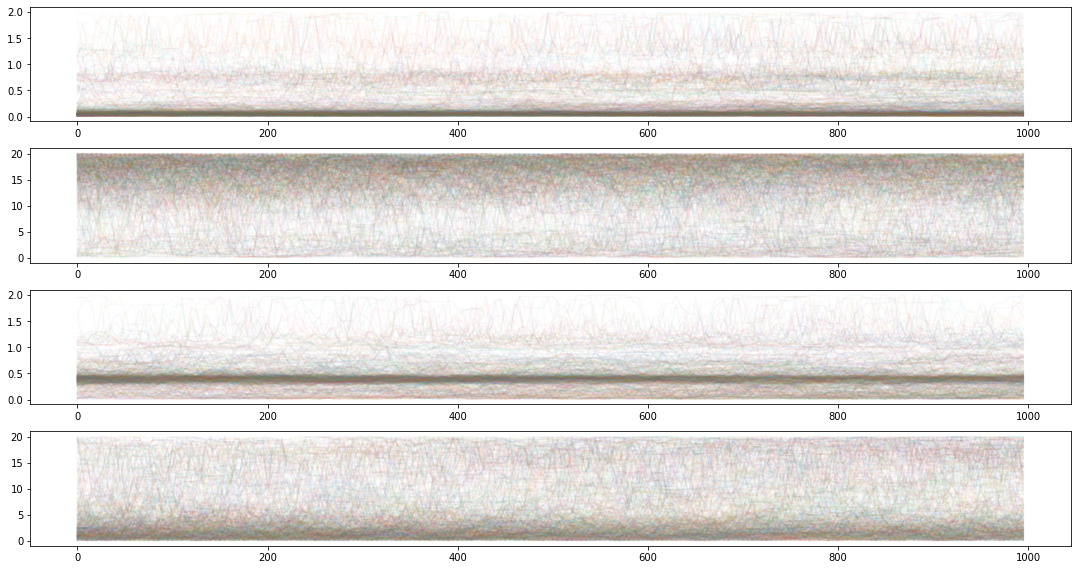

In [9]:
with chain.dataset() as d:
    W = d.shape[0]     # number of walkers
    S = d.shape[1]     # number of steps
    N = d.shape[2]     # number of paramters
    T = int(S / 200)   # "thinning"
    A = 20 / W
    figure, axes = plt.subplots(figsize = (15, 2 * N), ncols = 1, nrows = N)
    for i, ax in enumerate(axes):
        for j in range(0, W):
            ax.plot(range(0, S, T), d[j, ::T, i], alpha = A)
    plt.tight_layout(True)
    plt.savefig('plots/MCMCSamples.pdf', dpi = 192)

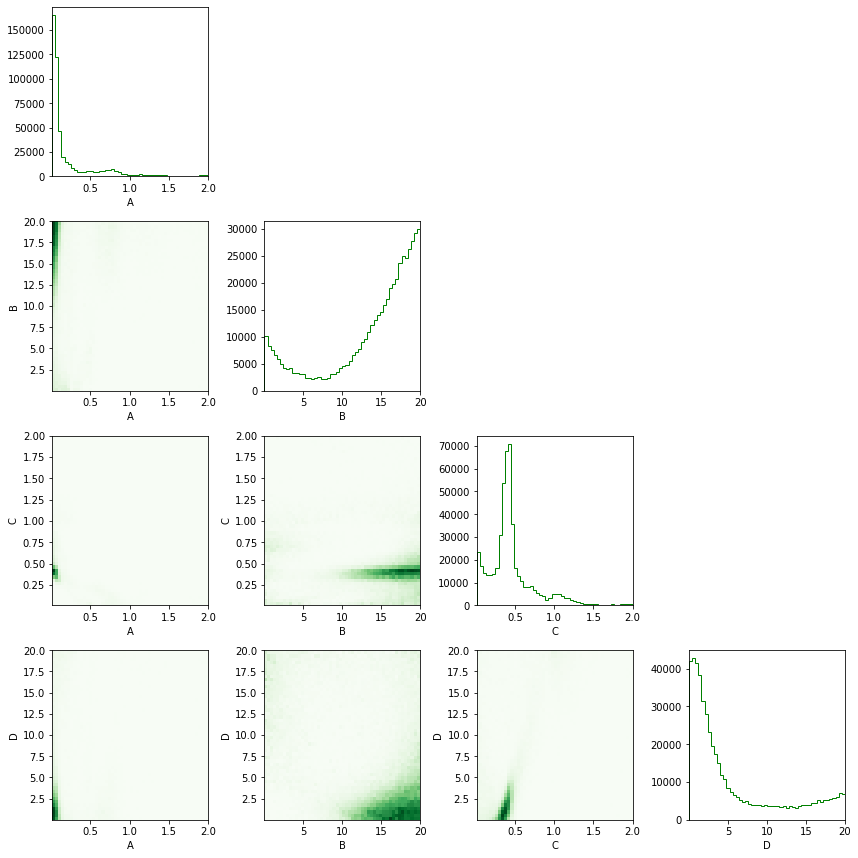

In [10]:
NDimension = len(AllData["labels"])
Ranges = np.array(AllData["ranges"]).T
figure, axes = plt.subplots(figsize = (3 * NDimension, 3 * NDimension), ncols = NDimension, nrows = NDimension)
Names = AllData["labels"]
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        if i==j:
            ax.hist(MCMCSamples[:,i], bins=50,
                    range=Ranges[:,i], histtype='step', color='green')
            ax.set_xlabel(Names[i])
            ax.set_xlim(*Ranges[:,j])
        if i>j:
            ax.hist2d(MCMCSamples[:, j], MCMCSamples[:, i], 
                      bins=50, range=[Ranges[:,j], Ranges[:,i]], 
                      cmap='Greens')
            ax.set_xlabel(Names[j])
            ax.set_ylabel(Names[i])
            ax.set_xlim(*Ranges[:,j])
            ax.set_ylim(*Ranges[:,i])
        if i<j:
            ax.axis('off')
plt.tight_layout(True)
plt.savefig('plots/Correlation.pdf', dpi = 192)
# figure

In [ ]:
NDimension = len(AllData["labels"])
Ranges = np.array(AllData["ranges"]).T
figure, axes = plt.subplots(figsize = (15, 15), ncols = NDimension, nrows = NDimension)
Names = [r"$A$", r"$C$", r"$B$", r"$D$", r"$Q$", r"$P_6$"]
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        if i==j:
            ax.hist(TransformedSamples[:,i], bins=50,
                    range=Ranges[:,i], histtype='step')
            ax.set_xlabel(Names[i])
            ax.set_xlim(*Ranges[:,j])
        if i>j:
            ax.hist2d(TransformedSamples[:, j], TransformedSamples[:, i], 
                      bins=50, range=[Ranges[:,j], Ranges[:,i]], 
                      cmap='Blues')
            ax.set_xlabel(Names[j])
            ax.set_ylabel(Names[i])
            ax.set_xlim(*Ranges[:,j])
            ax.set_ylim(*Ranges[:,i])
        if i<j:
            ax.axis('off')
plt.tight_layout(True)
plt.savefig('plots/TransformedCorrelation.pdf', dpi = 192)
# figure

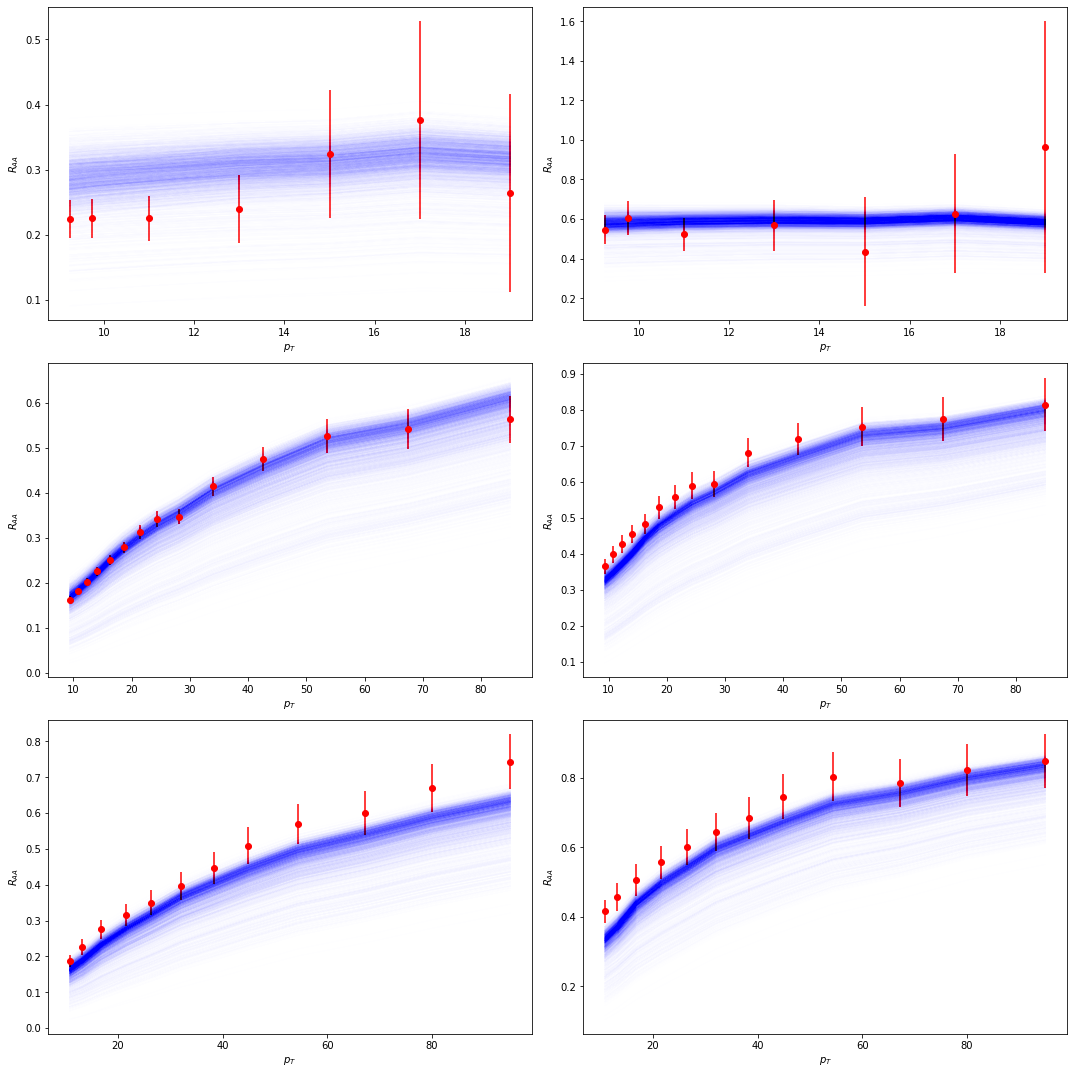

In [11]:
Examples = MCMCSamples[ np.random.choice(range(len(MCMCSamples)), 2500), :]

TempPrediction = {"AuAu200": EmulatorAuAu200.predict(Examples),
                 "PbPb2760": EmulatorPbPb2760.predict(Examples),
                 "PbPb5020": EmulatorPbPb5020.predict(Examples)}

SystemCount = len(AllData["systems"])

figure, axes = plt.subplots(figsize = (15, 5 * SystemCount), ncols = 2, nrows = SystemCount)

for s1 in range(0, SystemCount):
    for s2 in range(0, 2):
        axes[s1][s2].set_xlabel(r"$p_{T}$")
        axes[s1][s2].set_ylabel(r"$R_{AA}$")
        
        S1 = AllData["systems"][s1]
        O  = AllData["observables"][0][0]
        S2 = AllData["observables"][0][1][s2]

        DX = AllData["data"][S1][O][S2]['x']
        DY = AllData["data"][S1][O][S2]['y']
        DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)
                
        for i, y in enumerate(TempPrediction[S1][O][S2]):
            axes[s1][s2].plot(DX, y, 'b-', alpha=0.005, label="Posterior" if i==0 else '')
        axes[s1][s2].errorbar(DX, DY, yerr = DE, fmt='ro', label="Measurements")

plt.tight_layout(True)
figure.savefig('plots/ObservablePosterior.pdf', dpi = 192)
# figure

In [ ]:
Examples = AllData["design"]

TempPrediction = {"AuAu200": EmulatorAuAu200.predict(Examples),
                 "PbPb2760": EmulatorPbPb2760.predict(Examples),
                 "PbPb5020": EmulatorPbPb5020.predict(Examples)}

SystemCount = len(AllData["systems"])

figure, axes = plt.subplots(figsize = (15, 5 * SystemCount), ncols = 2, nrows = SystemCount)

for s1 in range(0, SystemCount):
    for s2 in range(0, 2):
        axes[s1][s2].set_xlabel(r"$p_{T}$")
        axes[s1][s2].set_ylabel(r"$R_{AA}$")
        
        S1 = AllData["systems"][s1]
        O  = AllData["observables"][0][0]
        S2 = AllData["observables"][0][1][s2]
        
        DX = AllData["data"][S1][O][S2]['x']
        DY = AllData["data"][S1][O][S2]['y']
        DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)
                
        for i, y in enumerate(TempPrediction[S1][O][S2]):
            axes[s1][s2].plot(DX, y, 'b-', alpha=0.1, label="Posterior" if i==0 else '')
        axes[s1][s2].errorbar(DX, DY, yerr = DE, fmt='ro', label="Measurements")

plt.tight_layout(True)
figure.savefig('plots/PredictedDesign.pdf', dpi = 192)
# figure

In [ ]:
TempPrediction = AllData["model"]

SystemCount = len(AllData["systems"])

figure, axes = plt.subplots(figsize = (15, 5 * SystemCount), ncols = 2, nrows = SystemCount)

for s1 in range(0, SystemCount):
    for s2 in range(0, 2):
        axes[s1][s2].set_xlabel(r"$p_{T}$")
        axes[s1][s2].set_ylabel(r"$R_{AA}$")
        
        S1 = AllData["systems"][s1]
        O  = AllData["observables"][0][0]
        S2 = AllData["observables"][0][1][s2]
        
        DX = AllData["data"][S1][O][S2]['x']
        DY = AllData["data"][S1][O][S2]['y']
        DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)
                
        for i, y in enumerate(TempPrediction[S1][O][S2]['Y']):
            # if AllData["design"][i][1] < 10 or AllData["design"][i][1] > 11:
            #     continue
            # if AllData["design"][i][2] < 0.3 or AllData["design"][i][2] > 0.5:
            #     continue
            axes[s1][s2].plot(DX, y, 'g-', alpha=0.1, label="Posterior" if i==0 else '')
        axes[s1][s2].errorbar(DX, DY, yerr = DE, fmt='ro', label="Measurements")

plt.tight_layout(True)
figure.savefig('plots/Design.pdf', dpi = 192)
# figure

In [ ]:
# close all plots to save memory
plt.close('all')

In [ ]:
# ! python3 -m src.simpleplots

## GP Quality tests

### Prediction Spread Test

In [ ]:
Examples = AllData["design"]

PredictionAuAu200, CovarianceAuAu200 = EmulatorAuAu200.predict(Examples, return_cov = True)
PredictionPbPb2760, CovariancePbPb2760 = EmulatorPbPb2760.predict(Examples, return_cov = True)
PredictionPbPb5020, CovariancePbPb5020 = EmulatorPbPb5020.predict(Examples, return_cov = True)

TempPrediction = {"AuAu200": PredictionAuAu200,
                 "PbPb2760": PredictionPbPb2760,
                 "PbPb5020": PredictionPbPb5020}
Covariance = {"AuAu200": CovarianceAuAu200,
             "PbPb2760": CovariancePbPb2760,
             "PbPb5020": CovariancePbPb5020}

SystemCount = len(AllData["systems"])

for s1 in range(0, SystemCount):
    for s2 in range(0, 2):
        S1 = AllData["systems"][s1]
        O  = AllData["observables"][0][0]
        S2 = AllData["observables"][0][1][s2]

        TempPrediction[S1][O][S2] = TempPrediction[S1][O][S2] - AllData["model"][S1][O][S2]['Y']

figure, axes = plt.subplots(figsize = (15, 5 * SystemCount), ncols = 2, nrows = SystemCount)

for s1 in range(0, SystemCount):
    for s2 in range(0, 2):
        axes[s1][s2].set_xlabel(r"$p_{T}$")
        axes[s1][s2].set_ylabel(r"$R_{AA}$")
        
        S1 = AllData["systems"][s1]
        O  = AllData["observables"][0][0]
        S2 = AllData["observables"][0][1][s2]
        
        DX = AllData["data"][S1][O][S2]['x']
        DY = AllData["data"][S1][O][S2]['y']
        DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)

        for i, y in enumerate(TempPrediction[S1][O][S2]):
            axes[s1][s2].plot(DX, y, 'b-', alpha=0.1, label="Posterior" if i==0 else '')

        for i, y in enumerate(Covariance[S1][(O,S2),(O,S2)]):
            axes[s1][s2].plot(DX, np.sqrt(np.array(y).diagonal()), 'c-', alpha=0.1)

plt.tight_layout(True)
figure.savefig('plots/PredictedDesign.pdf', dpi = 192)
# figure

In [ ]:
print(AllData["design"][5])
print(np.array(CovarianceAuAu200[("R_AA", "C1"), ("R_AA", "C1")][5]).diagonal())
print(AllData["design"][6])
print(np.array(CovarianceAuAu200[("R_AA", "C1"), ("R_AA", "C1")][6]).diagonal())

### Divergence Test

In [ ]:
Examples = np.random.rand(2000, 4)
Examples[:,0] = AllData["ranges"][0][0] + (AllData["ranges"][0][1] - AllData["ranges"][0][0]) * Examples[:,0]
Examples[:,1] = AllData["ranges"][1][0] + (AllData["ranges"][1][1] - AllData["ranges"][1][0]) * Examples[:,1]
Examples[:,2] = AllData["ranges"][2][0] + (AllData["ranges"][2][1] - AllData["ranges"][2][0]) * Examples[:,2]
Examples[:,3] = AllData["ranges"][3][0] + (AllData["ranges"][3][1] - AllData["ranges"][3][0]) * Examples[:,3]

PredictionAuAu200, CovarianceAuAu200 = EmulatorAuAu200.predict(Examples, return_cov = True)
PredictionPbPb2760, CovariancePbPb2760 = EmulatorPbPb2760.predict(Examples, return_cov = True)
PredictionPbPb5020, CovariancePbPb5020 = EmulatorPbPb5020.predict(Examples, return_cov = True)

TempPrediction = {"AuAu200": PredictionAuAu200,
                 "PbPb2760": PredictionPbPb2760,
                 "PbPb5020": PredictionPbPb5020}
Covariance = {"AuAu200": CovarianceAuAu200,
             "PbPb2760": CovariancePbPb2760,
             "PbPb5020": CovariancePbPb5020}

# for s1 in range(0, SystemCount):
#     for s2 in range(0, 2):
#         S1 = AllData["systems"][s1]
#         O  = AllData["observables"][0][0]
#         S2 = AllData["observables"][0][1][s2]
#         TempPrediction[S1][O][S2] = TempPrediction[S1][O][S2] - AllData["model"][S1][O][S2]['Y']


SystemCount = len(AllData["systems"])

figure, axes = plt.subplots(figsize = (15, 5 * SystemCount), ncols = 2, nrows = SystemCount)

AllSigma = np.array([])

for s1 in range(0, SystemCount):
    for s2 in range(0, 2):
        axes[s1][s2].set_xlabel(r"$p_{T}$")
        axes[s1][s2].set_ylabel(r"$R_{AA}$")
        
        S1 = AllData["systems"][s1]
        O  = AllData["observables"][0][0]
        S2 = AllData["observables"][0][1][s2]
        
        DX = AllData["data"][S1][O][S2]['x']
        DY = AllData["data"][S1][O][S2]['y']
        DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)

        # for i, y in enumerate(TempPrediction[S1][O][S2]):
        #     axes[s1][s2].plot(DX, y, 'b-', alpha=0.1, label="Posterior" if i==0 else '')
            
        for i, y in enumerate(Covariance[S1][(O,S2),(O,S2)]):
            axes[s1][s2].plot(DX, np.sqrt(np.array(y).diagonal()), 'c-', alpha=0.05)
            AllSigma = np.append(AllSigma, np.sqrt(np.array(y).diagonal()))

plt.tight_layout(True)
figure.savefig('plots/PredictedRandom.pdf', dpi = 192)
# figure

figure2, axis2 = plt.subplots(figsize = (10, 10))
axis2.hist(AllSigma, 30)
axis2.set_title('Mean = {:.5f}, RMS = {:.5f}'.format(np.mean(AllSigma), np.std(AllSigma)))
axis2.set_xlabel('sigma(R_AA)')
plt.tight_layout(True)
figure2.savefig('plots/PredictedRandomHistogram.pdf', dpi = 192)

In [ ]:
Examples.shape

### GP Stability Test

## Interactive debugger

### Prediction viewer

In [ ]:
%config InlineBackend.close_figures = True

SystemCount = len(AllData["systems"])
artist = [[None, None], [None, None], [None, None]]

figure, axes = plt.subplots(figsize = (10, 3 * SystemCount), ncols = 2, nrows = SystemCount)

for s1 in range(0, SystemCount):
    for s2 in range(0, 2):
        axes[s1][s2].set_xlabel(r"$p_{T}$")
        axes[s1][s2].set_ylabel(r"$R_{AA}$")
        
        S1 = AllData["systems"][s1]
        O  = AllData["observables"][0][0]
        S2 = AllData["observables"][0][1][s2]
        
        DX = AllData["data"][S1][O][S2]['x']
        DY = AllData["data"][S1][O][S2]['y']
        DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)
        
        axes[s1][s2].errorbar(range(1, len(DY)+1), DY, yerr = DE, fmt='ro', label="Measurements")

plt.close(figure)

def RunPrediction(A, B, C, D):
    # print ("Parameters = ", A, B, C, D)
    Examples = [[A, B, C, D]]

    TempPrediction = {"AuAu200": EmulatorAuAu200.predict(Examples),
                 "PbPb2760": EmulatorPbPb2760.predict(Examples),
                 "PbPb5020": EmulatorPbPb5020.predict(Examples)}

    for s1 in range(0, SystemCount):
        for s2 in range(0, 2):
            S1 = AllData["systems"][s1]
            O  = AllData["observables"][0][0]
            S2 = AllData["observables"][0][1][s2]
            
            DX = AllData["data"][S1][O][S2]['x']
            DY = AllData["data"][S1][O][S2]['y']
            DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)

            for i, y in enumerate(TempPrediction[S1][O][S2]):
                if artist[s1][s2] != None:
                    artist[s1][s2].remove()
                artist[s1][s2], = axes[s1][s2].plot(range(1, len(DY)+1), y, 'b-', alpha=1, label="Posterior" if i==0 else '')
            
    display(figure)
    print("Parameters = ", A, B, C, D)



interactive_plot = interactive(RunPrediction,
    A = widgets.FloatSlider(min = AllData["ranges"][0][0], max = AllData["ranges"][0][1], step = 0.001, continuous_update = False),
    B = widgets.FloatSlider(min = AllData["ranges"][1][0], max = AllData["ranges"][1][1], step = 0.01, continuous_update = False),
    C = widgets.FloatSlider(min = AllData["ranges"][2][0], max = AllData["ranges"][2][1], step = 0.001, continuous_update = False),
    D = widgets.FloatSlider(min = AllData["ranges"][3][0], max = AllData["ranges"][3][1], step = 0.01, continuous_update = False))

output = interactive_plot.children[-1]
output.layout.height = '10'
interactive_plot

# print(interactive_plot.children[-1].layout)

### K-nearest neighbor test

Distance is defined with Gaussian with some distance measure.  Let's put it as 0.1 to start with.  Then we simply loop over all model calculations and calculate the weighted average for given parameter set.

In [ ]:
%config InlineBackend.close_figures = True

SystemCount = len(AllData["systems"])
artist1 = [[None, None], [None, None], [None, None]]
artist2 = [[None, None], [None, None], [None, None]]

figure, axes = plt.subplots(figsize = (10, 3 * SystemCount), ncols = 2, nrows = SystemCount)

# Plot data points
for s1 in range(0, SystemCount):
    for s2 in range(0, 2):
        axes[s1][s2].set_xlabel(r"$p_{T}$")
        axes[s1][s2].set_ylabel(r"$R_{AA}$")
        
        S1 = AllData["systems"][s1]
        O  = AllData["observables"][0][0]
        S2 = AllData["observables"][0][1][s2]
        
        DX = AllData["data"][S1][O][S2]['x']
        DY = AllData["data"][S1][O][S2]['y']
        DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)
        
        axes[s1][s2].errorbar(range(1, len(DY)+1), DY, yerr = DE, fmt='ro', label="Measurements")

plt.close(figure)

# Update prediction from GP and from nearest neighbor
def RunPrediction(A, B, C, D):
    # print ("Parameters = ", A, B, C, D)
    Examples = [[A, B, C, D]]

    figure.suptitle('Parameters = ({:.3f}, {:.2f}, {:.3f}, {:.2f})'.format(A, B, C, D), fontsize=16)
    
    N = 100
    TempPrediction = {"AuAu200": EmulatorAuAu200.predict(Examples),
                 "PbPb2760": EmulatorPbPb2760.predict(Examples),
                 "PbPb5020": EmulatorPbPb5020.predict(Examples)}
    
    NewPrediction = {"AuAu200": {"R_AA": {"C0": np.zeros(AllData["model"]["AuAu200"]["R_AA"]["C0"]["Y"].shape[-1]),
                                          "C1": np.zeros(AllData["model"]["AuAu200"]["R_AA"]["C1"]["Y"].shape[-1])}},
        "PbPb2760": {"R_AA": {"C0": np.zeros(AllData["model"]["PbPb2760"]["R_AA"]["C0"]["Y"].shape[-1]),
                              "C1": np.zeros(AllData["model"]["PbPb2760"]["R_AA"]["C1"]["Y"].shape[-1])}},
        "PbPb5020": {"R_AA": {"C0": np.zeros(AllData["model"]["PbPb5020"]["R_AA"]["C0"]["Y"].shape[-1]),
                              "C1": np.zeros(AllData["model"]["PbPb5020"]["R_AA"]["C1"]["Y"].shape[-1])}}}
    
    TotalWeight = 0
    Sigma = 0.05
    for iP in range(AllData["design"].shape[0]):   # loop over design points
        Displacement = AllData["design"][iP] - Examples[0]
        for i in range(0, 4):
            Displacement[i] = Displacement[i] / (AllData["ranges"][i][1] - AllData["ranges"][i][0])
        Distance = np.linalg.norm(Displacement)
        Weight = np.exp(-(Distance * Distance) / (2 * Sigma * Sigma))
        TotalWeight = TotalWeight + Weight
        NewPrediction["AuAu200"]["R_AA"]["C0"] += AllData["model"]["AuAu200"]["R_AA"]["C0"]["Y"][iP] * Weight;
        NewPrediction["AuAu200"]["R_AA"]["C1"] += AllData["model"]["AuAu200"]["R_AA"]["C1"]["Y"][iP] * Weight;
        NewPrediction["PbPb2760"]["R_AA"]["C0"] += AllData["model"]["PbPb2760"]["R_AA"]["C0"]["Y"][iP] * Weight;
        NewPrediction["PbPb2760"]["R_AA"]["C1"] += AllData["model"]["PbPb2760"]["R_AA"]["C1"]["Y"][iP] * Weight;
        NewPrediction["PbPb5020"]["R_AA"]["C0"] += AllData["model"]["PbPb5020"]["R_AA"]["C0"]["Y"][iP] * Weight;
        NewPrediction["PbPb5020"]["R_AA"]["C1"] += AllData["model"]["PbPb5020"]["R_AA"]["C1"]["Y"][iP] * Weight;
    NewPrediction["AuAu200"]["R_AA"]["C0"] /= TotalWeight
    NewPrediction["AuAu200"]["R_AA"]["C1"] /= TotalWeight
    NewPrediction["PbPb2760"]["R_AA"]["C0"] /= TotalWeight
    NewPrediction["PbPb2760"]["R_AA"]["C1"] /= TotalWeight
    NewPrediction["PbPb5020"]["R_AA"]["C0"] /= TotalWeight
    NewPrediction["PbPb5020"]["R_AA"]["C1"] /= TotalWeight

    for s1 in range(0, SystemCount):
        for s2 in range(0, 2):
            S1 = AllData["systems"][s1]
            O  = AllData["observables"][0][0]
            S2 = AllData["observables"][0][1][s2]
            
            DX = AllData["data"][S1][O][S2]['x']
            DY = AllData["data"][S1][O][S2]['y']
            DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)

            for i, y in enumerate(TempPrediction[S1][O][S2]):
                if artist1[s1][s2] != None:
                    artist1[s1][s2].remove()
                artist1[s1][s2], = axes[s1][s2].plot(range(1, len(y)+1), y, 'b-', alpha=1, label="Posterior" if i==0 else '')
            
            y2 = NewPrediction[S1][O][S2]
            
            if artist2[s1][s2] != None:
                artist2[s1][s2].remove()
            artist2[s1][s2], = axes[s1][s2].plot(range(1, len(y2)+1), y2, 'g-', alpha=1)
            
    display(figure)
    print("Parameters = ", A, B, C, D)
    print("Likelihood = ", chain.log_posterior([A, B, C, D]))


Default = [0.176, 3.52, 0.290, 4.56] # Paper LBT median
# Default = [0.052, 17, 0.4, 1.5]
# Default = [0.02, 19.95, 0.35, 0.02] # LBT best fit
# Default = [1.06, 0.541, 0.568, 2.488] # LBT design 1
# Default = [0.329, 2.909, 0.208, 4.161] # LBT design 2
# Default = [0.983, 1.656, 0.293, 0.933] # LBT design 3
# Default = [0.02, 0.04, 0.260, 0.18] # Test point 1 LBT
# Default = [0.02, 0.04, 1.666, 0.18] # Test point 2 LBT

interactive_plot = interactive(RunPrediction,
    A = widgets.FloatSlider(min = AllData["ranges"][0][0], max = AllData["ranges"][0][1], step = 0.001, continuous_update = False, value = Default[0]),
    B = widgets.FloatSlider(min = AllData["ranges"][1][0], max = AllData["ranges"][1][1], step = 0.001, continuous_update = False, value = Default[1]),
    C = widgets.FloatSlider(min = AllData["ranges"][2][0], max = AllData["ranges"][2][1], step = 0.001, continuous_update = False, value = Default[2]),
    D = widgets.FloatSlider(min = AllData["ranges"][3][0], max = AllData["ranges"][3][1], step = 0.001, continuous_update = False, value = Default[3]))

output = interactive_plot.children[-1]
output.layout.height = '10'
interactive_plot

# print(interactive_plot.children[-1].layout)

### Plot likelihoods

In [ ]:
# Default = [0.02, 19.99, 0.35, 0.02]
# Default = [0.176, 3.52, 0.290, 4.56] # LBT in table 1 in paper
Default = [0.02, 19.95, 0.35, 0.02]
# Default = [0.39, 0.21, 0.05, 2.7]

Labels = AllData["labels"]

N = 100
model_cov_modifier = 1
model_cov_factor = -1
model_sys_error = False

figure, axis = plt.subplots(figsize = (15, 15), ncols = 4 - 1, nrows = 4 - 1)

for i1 in range(0,3):
    for i2 in range(0,3):
        if i1 < i2:
            axis[i1][i2].axis('off')
            continue
        
        YMin = AllData["ranges"][i1+1][0]
        YMax = AllData["ranges"][i1+1][1]
        XMin = AllData["ranges"][i2][0]
        XMax = AllData["ranges"][i2][1]
        
        TestSamples = np.array([[Default for A in range(0, N)] for B in range(0, N)])
        LS1 = np.linspace(YMin, YMax, N)
        LS2 = np.linspace(XMin, XMax, N)
        for j1 in range(0, N):
            for j2 in range(0, N):
                TestSamples[j1, j2, i1 + 1] = LS1[j1]
                TestSamples[j1, j2, i2] = LS2[j2]
        
        # TestSamples = np.array([[[A, B, C, D] for B in np.linspace(0.02, 19.99, N)] for C in np.linspace(0.2, 1.99, N)])
        # TestLikelihood1 = chain.log_posterior(TestSamples.reshape(-1, 4), model_cov_modifier = model_cov_modifier, model_sys_error = model_sys_error).reshape(N, N)
        # TestLikelihood0 = chain.log_posterior(TestSamples.reshape(-1, 4), model_cov_modifier = 0, model_sys_error = model_sys_error).reshape(N, N)
        
        # TestLikelihood1[np.isinf(TestLikelihood1)] = -1000
        # TestLikelihood0[np.isinf(TestLikelihood0)] = -1000

        # TestLikelihood = np.array(TestLikelihood1) * model_cov_factor + np.array(TestLikelihood0) * (1 - model_cov_factor)
        
        TestLikelihood = chain.log_posterior(TestSamples.reshape(-1, 4), model_cov_modifier = model_cov_modifier, model_cov_factor = model_cov_factor, model_sys_error = model_sys_error).reshape(N, N)
        
        # print(TestLikelihood1)
        # print(TestLikelihood0)
        # print(TestLikelihood)
        
        Maximum = np.amax(TestLikelihood)
        Minimum = Maximum - 25
        TestLikelihood[TestLikelihood < Minimum] = Minimum
        
        im = axis[i1][i2].imshow(TestLikelihood, interpolation="nearest", origin='lower', extent = (XMin, XMax, YMin, YMax), aspect='auto', cmap='nipy_spectral')
        axis[i1][i2].set_ylabel(Labels[i1+1])
        axis[i1][i2].set_xlabel(Labels[i2])
        Title = ""
        for i in range(0, 4):
            if i == i1 + 1 or i == i2:
                continue
            if Title != "":
                Title = Title + ", "
            Title = Title + '{:s} = {:.2f}'.format(Labels[i], Default[i])
        axis[i1][i2].set_title(Title)
        figure.colorbar(im, ax = axis[i1][i2])
        
figure.tight_layout()

figure.savefig('plots/Likelihood.pdf', dpi = 384)

### Plot design point locations

In [ ]:
Default = [0.02, 19.95, 0.35, 0.02]
# Default = [0.176, 3.52, 0.290, 4.56] # LBT in table 1 in paper
# Default = [0.39, 0.21, 0.05, 2.7]
Labels = AllData["labels"]

figure, axis = plt.subplots(figsize = (15, 15), ncols = 4 - 1, nrows = 4 - 1)

for i1 in range(0,3):
    for i2 in range(0,3):
        if i1 < i2:
            axis[i1][i2].axis('off')
            continue
        
        XMin = AllData["ranges"][i1+1][0]
        XMax = AllData["ranges"][i1+1][1]
        YMin = AllData["ranges"][i2][0]
        YMax = AllData["ranges"][i2][1]
        
        # TestSamples = np.array([[Default for A in range(0, N)] for B in range(0, N)])
        # LS1 = np.linspace(XMin, XMax, N)
        # LS2 = np.linspace(YMin, YMax, N)
        # for j1 in range(0, N):
        #     for j2 in range(0, N):
        #         TestSamples[j1, j2, i1 + 1] = LS1[j1]
        #         TestSamples[j1, j2, i2] = LS2[j2]
        
        # TestSamples = np.array([[[A, B, C, D] for B in np.linspace(0.02, 19.99, N)] for C in np.linspace(0.2, 1.99, N)])
        # TestLikelihood = chain.log_posterior(TestSamples.reshape(-1, 4), model_cov_modifier = model_cov_modifier, model_sys_error = model_sys_error).reshape(N, N)
        # Maximum = np.amax(TestLikelihood)
        # Minimum = Maximum - 25
        # TestLikelihood[TestLikelihood < Minimum] = Minimum
        
        # im = axis[i1][i2].imshow(TestLikelihood, interpolation="none", origin='lower', extent = (XMin, XMax, YMin, YMax), aspect='auto', cmap='nipy_spectral')
        axis[i1][i2].set_xlabel(Labels[i2])
        axis[i1][i2].set_ylabel(Labels[i1+1])
        axis[i1][i2].set_xlim(left = YMin, right = YMax)
        axis[i1][i2].set_ylim(bottom = XMin, top = XMax)
        Title = ""
        for i in range(0, 4):
            if i == i1 + 1 or i == i2:
                continue
            if Title != "":
                Title = Title + ", "
            Title = Title + '{:s} = {:.2f}'.format(Labels[i], Default[i])
        axis[i1][i2].set_title(Title)
        
        for Point in AllData["design"]:
            Displacement = Point - Default
            Displacement[i1+1] = 0
            Displacement[i2] = 0
            for i in range(0, 4):
                Displacement[i] = Displacement[i] / (AllData["ranges"][i][1] - AllData["ranges"][i][0])
            Distance = np.linalg.norm(Displacement)
            Alpha = np.exp(-Distance / 0.25)
            axis[i1][i2].plot(Point[i2], Point[i1+1], 'bo', fillstyle = 'full', alpha = Alpha)
            axis[i1][i2].plot(Point[i2], Point[i1+1], 'ko', fillstyle = 'none')
        # figure.colorbar(im, ax = axis[i1][i2])

figure.tight_layout()

figure.savefig('plots/DesignLocation.pdf', dpi = 192)

### Design predictive test

In [ ]:
Examples = AllData["design"]

TempPrediction = {"AuAu200": EmulatorAuAu200.predict(Examples),
                 "PbPb2760": EmulatorPbPb2760.predict(Examples),
                 "PbPb5020": EmulatorPbPb5020.predict(Examples)}

SystemCount = len(AllData["systems"])

figure, axes = plt.subplots(figsize = (15, 5 * SystemCount), ncols = 2, nrows = SystemCount)

for s1 in range(0, SystemCount):
    for s2 in range(0, 2):
        axes[s1][s2].set_xlabel(r"$p_{T}$")
        axes[s1][s2].set_ylabel(r"$R_{AA}$")
        
        S1 = AllData["systems"][s1]
        O  = AllData["observables"][0][0]
        S2 = AllData["observables"][0][1][s2]
        
        DX = AllData["data"][S1][O][S2]['x']
        DY = AllData["data"][S1][O][S2]['y']
        DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)
                
        for i, y in enumerate(TempPrediction[S1][O][S2]):
            axes[s1][s2].plot(y - AllData["model"][S1][O][S2]['Y'][i], '-', alpha=0.5, label="Posterior" if i==0 else '')

plt.tight_layout(True)
figure.savefig('plots/DesignDifference.pdf', dpi = 192)
# figure

# Scratch space

In [ ]:
AllData["design"]

In [ ]:
AllData["model"]

In [ ]:
AllData["data"]

In [ ]:
figure.savefig('plots/Likelihood.pdf', dpi = 192)

In [ ]:
'''
# Extract predictions from Matter+LBT 2 files
TEMP1 = np.loadtxt('original/MATTER+LBT_method-2/forSTAT-4D-new-81pts/forSTAT/AuAu200-cen-00-10.dat')
TEMP2 = np.loadtxt('original/MATTER+LBT_method-2/forSTAT-4D-new-81pts/forSTAT/AuAu200-cen-40-50.dat')
TEMP3 = np.loadtxt('original/MATTER+LBT_method-2/forSTAT-4D-new-81pts/forSTAT/PbPb2760-cen-00-05.dat')
TEMP4 = np.loadtxt('original/MATTER+LBT_method-2/forSTAT-4D-new-81pts/forSTAT/PbPb2760-cen-30-40.dat')
TEMP5 = np.loadtxt('original/MATTER+LBT_method-2/forSTAT-4D-new-81pts/forSTAT/PbPb5020-cen-00-10.dat')
TEMP6 = np.loadtxt('original/MATTER+LBT_method-2/forSTAT-4D-new-81pts/forSTAT/PbPb5020-cen-30-50.dat')
np.savetxt('input/MATTERLBT2/Prediction_PHENIX_AuAu200_RAACharged_0to10_2013.dat', TEMP1[:,4:])
np.savetxt('input/MATTERLBT2/Prediction_PHENIX_AuAu200_RAACharged_40to50_2013.dat', TEMP2[:,4:])
np.savetxt('input/MATTERLBT2/Prediction_ATLAS_PbPb2760_RAACharged_0to5_2015.dat', TEMP3[:,4:])
np.savetxt('input/MATTERLBT2/Prediction_ATLAS_PbPb2760_RAACharged_30to40_2015.dat', TEMP4[:,4:])
np.savetxt('input/MATTERLBT2/Prediction_CMS_PbPb5020_RAACharged_0to10_2017.dat', TEMP5[:,4:])
np.savetxt('input/MATTERLBT2/Prediction_CMS_PbPb5020_RAACharged_30to50_2017.dat', TEMP6[:,4:])
'''

In [ ]:
'''
# Extract predictions from MATTER files
TEMP11 = np.loadtxt('original/MATTER/forSTAT-MATTER/forSTAT/AuAu200-cen-00-10.dat')
TEMP21 = np.loadtxt('original/MATTER/forSTAT-MATTER/forSTAT/AuAu200-cen-40-50.dat')
TEMP31 = np.loadtxt('original/MATTER/forSTAT-MATTER/forSTAT/PbPb2760-cen-00-05.dat')
TEMP41 = np.loadtxt('original/MATTER/forSTAT-MATTER/forSTAT/PbPb2760-cen-30-40.dat')
TEMP51 = np.loadtxt('original/MATTER/forSTAT-MATTER/forSTAT/PbPb5020-cen-00-10.dat')
TEMP61 = np.loadtxt('original/MATTER/forSTAT-MATTER/forSTAT/PbPb5020-cen-30-50.dat')
TEMP12 = np.loadtxt('original/MATTER/forSTAT-MATTER-add4/forSTAT/AuAu200-cen-00-10.dat')
TEMP22 = np.loadtxt('original/MATTER/forSTAT-MATTER-add4/forSTAT/AuAu200-cen-40-50.dat')
TEMP32 = np.loadtxt('original/MATTER/forSTAT-MATTER-add4/forSTAT/PbPb2760-cen-00-05.dat')
TEMP42 = np.loadtxt('original/MATTER/forSTAT-MATTER-add4/forSTAT/PbPb2760-cen-30-40.dat')
TEMP52 = np.loadtxt('original/MATTER/forSTAT-MATTER-add4/forSTAT/PbPb5020-cen-00-10.dat')
TEMP62 = np.loadtxt('original/MATTER/forSTAT-MATTER-add4/forSTAT/PbPb5020-cen-30-50.dat')
np.savetxt('input/MATTER/Prediction_PHENIX_AuAu200_RAACharged_0to10_2013.dat',  np.concatenate((TEMP11[:,4:], TEMP12[:,4:]), axis = 1))
np.savetxt('input/MATTER/Prediction_PHENIX_AuAu200_RAACharged_40to50_2013.dat', np.concatenate((TEMP21[:,4:], TEMP22[:,4:]), axis = 1))
np.savetxt('input/MATTER/Prediction_ATLAS_PbPb2760_RAACharged_0to5_2015.dat',   np.concatenate((TEMP31[:,4:], TEMP32[:,4:]), axis = 1))
np.savetxt('input/MATTER/Prediction_ATLAS_PbPb2760_RAACharged_30to40_2015.dat', np.concatenate((TEMP41[:,4:], TEMP42[:,4:]), axis = 1))
np.savetxt('input/MATTER/Prediction_CMS_PbPb5020_RAACharged_0to10_2017.dat',    np.concatenate((TEMP51[:,4:], TEMP52[:,4:]), axis = 1))
np.savetxt('input/MATTER/Prediction_CMS_PbPb5020_RAACharged_30to50_2017.dat',   np.concatenate((TEMP61[:,4:], TEMP62[:,4:]), axis = 1))
'''

In [ ]:
'''
# Extract predictions from LBT files
TEMP11 = np.loadtxt('original/LBT/run_1_60-points/forSTAT/AuAu200-cen-00-10.dat')
TEMP21 = np.loadtxt('original/LBT/run_1_60-points/forSTAT/AuAu200-cen-40-50.dat')
TEMP31 = np.loadtxt('original/LBT/run_1_60-points/forSTAT/PbPb2760-cen-00-05.dat')
TEMP41 = np.loadtxt('original/LBT/run_1_60-points/forSTAT/PbPb2760-cen-30-40.dat')
TEMP51 = np.loadtxt('original/LBT/run_1_60-points/forSTAT/PbPb5020-cen-00-10.dat')
TEMP61 = np.loadtxt('original/LBT/run_1_60-points/forSTAT/PbPb5020-cen-30-50.dat')

TEMP12 = np.loadtxt('original/LBT/run_2_20-points/forSTAT-combine/AuAu200-cen-00-10.dat')
TEMP22 = np.loadtxt('original/LBT/run_2_20-points/forSTAT-combine/AuAu200-cen-40-50.dat')
TEMP32 = np.loadtxt('original/LBT/run_2_20-points/forSTAT-combine/PbPb2760-cen-00-05.dat')
TEMP42 = np.loadtxt('original/LBT/run_2_20-points/forSTAT-combine/PbPb2760-cen-30-40.dat')
TEMP52 = np.loadtxt('original/LBT/run_2_20-points/forSTAT-combine/PbPb5020-cen-00-10.dat')
TEMP62 = np.loadtxt('original/LBT/run_2_20-points/forSTAT-combine/PbPb5020-cen-30-50.dat')

TEMP13 = np.loadtxt('original/LBT/run_3_40-points/forSTAT-qhat-4D-add2/AuAu200-cen-00-10.dat')
TEMP23 = np.loadtxt('original/LBT/run_3_40-points/forSTAT-qhat-4D-add2/AuAu200-cen-40-50.dat')
TEMP33 = np.loadtxt('original/LBT/run_3_40-points/forSTAT-qhat-4D-add2/PbPb2760-cen-00-05.dat')
TEMP43 = np.loadtxt('original/LBT/run_3_40-points/forSTAT-qhat-4D-add2/PbPb2760-cen-30-40.dat')
TEMP53 = np.loadtxt('original/LBT/run_3_40-points/forSTAT-qhat-4D-add2/PbPb5020-cen-00-10.dat')
TEMP63 = np.loadtxt('original/LBT/run_3_40-points/forSTAT-qhat-4D-add2/PbPb5020-cen-30-50.dat')

TEMP14 = np.loadtxt('original/LBT/run_4_20-points/forSTAT/AuAu200-cen-00-10.dat')
TEMP24 = np.loadtxt('original/LBT/run_4_20-points/forSTAT/AuAu200-cen-40-50.dat')
TEMP34 = np.loadtxt('original/LBT/run_4_20-points/forSTAT/PbPb2760-cen-00-05.dat')
TEMP44 = np.loadtxt('original/LBT/run_4_20-points/forSTAT/PbPb2760-cen-30-40.dat')
TEMP54 = np.loadtxt('original/LBT/run_4_20-points/forSTAT/PbPb5020-cen-00-10.dat')
TEMP64 = np.loadtxt('original/LBT/run_4_20-points/forSTAT/PbPb5020-cen-30-50.dat')

np.savetxt('input/LBT/Prediction_PHENIX_AuAu200_RAACharged_0to10_2013.dat',  np.concatenate((TEMP11[:,4:], TEMP12[:,4:], TEMP13[:,4:], TEMP14[:,4:]), axis = 1))
np.savetxt('input/LBT/Prediction_PHENIX_AuAu200_RAACharged_40to50_2013.dat', np.concatenate((TEMP21[:,4:], TEMP22[:,4:], TEMP23[:,4:], TEMP24[:,4:]), axis = 1))
np.savetxt('input/LBT/Prediction_ATLAS_PbPb2760_RAACharged_0to5_2015.dat',   np.concatenate((TEMP31[:,4:], TEMP32[:,4:], TEMP33[:,4:], TEMP34[:,4:]), axis = 1))
np.savetxt('input/LBT/Prediction_ATLAS_PbPb2760_RAACharged_30to40_2015.dat', np.concatenate((TEMP41[:,4:], TEMP42[:,4:], TEMP43[:,4:], TEMP44[:,4:]), axis = 1))
np.savetxt('input/LBT/Prediction_CMS_PbPb5020_RAACharged_0to10_2017.dat',    np.concatenate((TEMP51[:,4:], TEMP52[:,4:], TEMP53[:,4:], TEMP54[:,4:]), axis = 1))
np.savetxt('input/LBT/Prediction_CMS_PbPb5020_RAACharged_30to50_2017.dat',   np.concatenate((TEMP61[:,4:], TEMP62[:,4:], TEMP63[:,4:], TEMP64[:,4:]), axis = 1))
'''

In [ ]:
AllData["design"]

In [ ]:
AllData["model"]["AuAu200"]["R_AA"]["C0"]["Y"][79]

In [ ]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In [ ]:
a = [x * 3 for x in list([3, 4, 5])]
a

In [ ]:
AllData["design"][125]

In [ ]:
print(AllData["model"]["AuAu200"]["R_AA"]["C0"]["Y"][125])
print(AllData["model"]["AuAu200"]["R_AA"]["C1"]["Y"][125])
print(AllData["model"]["PbPb2760"]["R_AA"]["C0"]["Y"][125])
print(AllData["model"]["PbPb2760"]["R_AA"]["C1"]["Y"][125])
print(AllData["model"]["PbPb5020"]["R_AA"]["C0"]["Y"][125])
print(AllData["model"]["PbPb5020"]["R_AA"]["C1"]["Y"][125])

In [ ]:
print(AllData["data"]["AuAu200"]["R_AA"]["C0"]["y"])
print(AllData["data"]["AuAu200"]["R_AA"]["C1"]["y"])
print(AllData["data"]["PbPb2760"]["R_AA"]["C0"]["y"])
print(AllData["data"]["PbPb2760"]["R_AA"]["C1"]["y"])
print(AllData["data"]["PbPb5020"]["R_AA"]["C0"]["y"])
print(AllData["data"]["PbPb5020"]["R_AA"]["C1"]["y"])

In [ ]:
np.delete(RawDesignL['Design'], 79, axis = 0).shape